In [1]:
from os.path import realpath
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import join as join
from porcetagem import *

In [2]:

path1 = "/home/luan/Desktop/feijao/Classificacao-main/imagens_cortadas/"
path2 = "/home/luan/Desktop/feijao/Classificacao-main/lote_de_imagens_PDI/"
path3 = "/home/luan/Desktop/feijao/Classificacao-main/projetoPDI"

In [3]:
imagens_externas = []
imagens_internas = []

In [4]:
for dic in glob.glob("/home/luan/Desktop/feijao/Classificacao-main/imagens_cortadas/*"):
    for img_path in glob.glob(os.path.join(dic, "*.jpg")):
        label = img_path.split("_")
        print(label)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    
        if(label[5] == 'EXTERNO'):
            imagens_externas.append(np.array(process_data(img, label)).reshape(-1))

        if(label[5] == 'INTERNO'):
            imagens_internas.append(np.array(process_data(img, label)).reshape(-1))


['/home/luan/Desktop/feijao/Classificacao-main/imagens', 'cortadas/LOTE', 'EXTERNO', '3', 'R1/LOTE', 'EXTERNO', '3', 'R1', 'semente', '6.jpg']
['/home/luan/Desktop/feijao/Classificacao-main/imagens', 'cortadas/LOTE', 'EXTERNO', '3', 'R1/LOTE', 'EXTERNO', '3', 'R1', 'semente', '27.jpg']
['/home/luan/Desktop/feijao/Classificacao-main/imagens', 'cortadas/LOTE', 'EXTERNO', '3', 'R1/LOTE', 'EXTERNO', '3', 'R1', 'semente', '41.jpg']
['/home/luan/Desktop/feijao/Classificacao-main/imagens', 'cortadas/LOTE', 'EXTERNO', '3', 'R1/LOTE', 'EXTERNO', '3', 'R1', 'semente', '35.jpg']
['/home/luan/Desktop/feijao/Classificacao-main/imagens', 'cortadas/LOTE', 'EXTERNO', '3', 'R1/LOTE', 'EXTERNO', '3', 'R1', 'semente', '38.jpg']
['/home/luan/Desktop/feijao/Classificacao-main/imagens', 'cortadas/LOTE', 'EXTERNO', '3', 'R1/LOTE', 'EXTERNO', '3', 'R1', 'semente', '5.jpg']
['/home/luan/Desktop/feijao/Classificacao-main/imagens', 'cortadas/LOTE', 'EXTERNO', '3', 'R1/LOTE', 'EXTERNO', '3', 'R1', 'semente', '4.j

In [5]:
imagens_internas

[array(['2', '32.jpg', '2', '0.2332440602765549', '0.7481465304198899',
        '0.03728778491706801', '0', '0.0'], dtype='<U32'),
 array(['2', '13.jpg', '2', '0.20931639443436176', '0.7675494611368779',
        '0.009141628016401155', '0', '0.0'], dtype='<U32'),
 array(['2', '37.jpg', '2', '0.1332146037399822', '0.8394813000890472',
        '0.0053317008014247555', '0', '0.0'], dtype='<U32'),
 array(['2', '35.jpg', '2', '0.21800197823936696', '0.7632267282118914',
        '0.02711286954610397', '1', '0.21151932670213786'], dtype='<U32'),
 array(['2', '47.jpg', '2', '0.1747404239450899', '0.8012655425168681',
        '0.014310186102338807', '0', '0.0'], dtype='<U32'),
 array(['2', '6.jpg', '2', '0.2581935630099728', '0.7207275611967362',
        '0.010879419764279238', '0', '0.0'], dtype='<U32'),
 array(['2', '5.jpg', '2', '0.16358136584039515', '0.8190963882720805',
        '0.009980967054878324', '0', '0.0'], dtype='<U32'),
 array(['2', '2.jpg', '2', '0.24183840551069957', '0.7470837

In [6]:
imagens_internas = pd.DataFrame(imagens_internas, columns= ['LOTE','SEMENTE', 'REPETICAO', 'Porcentagem de Branco', 'Porcentagem de Vermelho Carmim Claro', 'Porcentagem de Vermelho Carmim Escuro', 'Quantidade de Buracos', 'Área Buraco/Área Semente'])

In [7]:
imagens_internas

,LOTE,SEMENTE,REPETICAO,Porcentagem de Branco,Porcentagem de Vermelho Carmim Claro,Porcentagem de Vermelho Carmim Escuro,Quantidade de Buracos,Área Buraco/Área Semente
0,2,32.jpg,2,0.2332440602765549,0.7481465304198899,0.03728778491706801,0,0.0
1,2,13.jpg,2,0.20931639443436176,0.7675494611368779,0.009141628016401155,0,0.0
2,2,37.jpg,2,0.1332146037399822,0.8394813000890472,0.0053317008014247555,0,0.0
3,2,35.jpg,2,0.21800197823936696,0.7632267282118914,0.02711286954610397,1,0.21151932670213786
4,2,47.jpg,2,0.1747404239450899,0.8012655425168681,0.014310186102338807,0,0.0
...,...,...,...,...,...,...,...,...
445,1,15.jpg,2,0.2829182947454365,0.6944538403219223,0.028786376625648803,0,0.0
446,1,21.jpg,2,0.28056312881511325,0.6830530557097015,0.012401380075759404,0,0.0
447,1,29.jpg,2,0.24779416301598076,0.7290923674955266,0.03536743382489048,0,0.0
448,1,12.jpg,2,0.2844355811149244,0.6915290789351637,0.008788609590947037,0,0.0


In [8]:
imagens_externas

[array(['3', '6.jpg', '1', '0.012196921920914568', '0.9624565593677459',
        '0.0034081608007836086', '0', '0.0'], dtype='<U32'),
 array(['3', '27.jpg', '1', '0.0036482235858299387', '0.9763703398133347',
        '0.003635332336410045', '0', '0.0'], dtype='<U32'),
 array(['3', '41.jpg', '1', '0.026338147833474938', '0.9503041091826139',
        '0.014254696497687153', '0', '0.0'], dtype='<U32'),
 array(['3', '35.jpg', '1', '0.0', '0.9885398862394575',
        '0.019767995740984617', '0', '0.0'], dtype='<U32'),
 array(['3', '38.jpg', '1', '0.0030322155754349375', '0.9777591789693211',
        '0.006489764557378848', '0', '0.0'], dtype='<U32'),
 array(['3', '5.jpg', '1', '0.006108735491753207', '0.9744654856444716',
        '0.005715061426729112', '0', '0'], dtype='<U32'),
 array(['3', '4.jpg', '1', '0.0003487405102341927', '0.9839042841430372',
        '0.00867827346621241', '0', '0'], dtype='<U32'),
 array(['3', '37.jpg', '1', '0.0011889941109821092', '0.9749052301752718',
        

In [9]:
imagens_externas = pd.DataFrame(imagens_externas, columns= ['LOTE','SEMENTE', 'REPETICAO', 'Porcentagem de Branco', 'Porcentagem de Vermelho Carmim Claro', 'Porcentagem de Vermelho Carmim Escuro', 'Quantidade de Buracos', 'Área Buraco/Área Semente'])

In [10]:
imagens_externas

,LOTE,SEMENTE,REPETICAO,Porcentagem de Branco,Porcentagem de Vermelho Carmim Claro,Porcentagem de Vermelho Carmim Escuro,Quantidade de Buracos,Área Buraco/Área Semente
0,3,6.jpg,1,0.012196921920914568,0.9624565593677459,0.0034081608007836086,0,0.0
1,3,27.jpg,1,0.0036482235858299387,0.9763703398133347,0.003635332336410045,0,0.0
2,3,41.jpg,1,0.026338147833474938,0.9503041091826139,0.014254696497687153,0,0.0
3,3,35.jpg,1,0.0,0.9885398862394575,0.019767995740984617,0,0.0
4,3,38.jpg,1,0.0030322155754349375,0.9777591789693211,0.006489764557378848,0,0.0
...,...,...,...,...,...,...,...,...
395,8,50.jpg,1,0.036242103716762154,0.9412810342294696,0.052387248420743354,0,0.0
396,8,19.jpg,1,0.02014280554552274,0.9408218264662573,0.0039174283888533884,0,0.0
397,8,5.jpg,1,0.029106485803723433,0.8885715854797078,0.004997528694601571,0,0.0
398,8,46.jpg,1,0.05425832533362177,0.9090601803653277,0.01350711861656819,0,0.0


In [11]:
imagens_internas[(imagens_internas['LOTE'] == '10')]

,LOTE,SEMENTE,REPETICAO,Porcentagem de Branco,Porcentagem de Vermelho Carmim Claro,Porcentagem de Vermelho Carmim Escuro,Quantidade de Buracos,Área Buraco/Área Semente
150,10,28.jpg,2,0.3237291043678612,0.6308397470464239,0.014375704691406442,1,0.0008157839492714548
151,10,40.jpg,2,0.2487640947650516,0.722838284085119,0.042633382471343725,0,0.0
152,10,35.jpg,2,0.2970651921738458,0.6719085917562447,0.06325110200293868,0,0.0
153,10,24.jpg,2,0.25924883777832153,0.7111450942011255,0.05415953021776364,2,0.0019120369676333439
154,10,30.jpg,2,0.3283270340163119,0.6426795305351104,0.03404117764074,2,0.035551601980511854
155,10,3.jpg,2,0.2537505511135473,0.7175796284600994,0.029349030635955245,0,0.0
156,10,27.jpg,2,0.2716769737838184,0.687478890791144,0.006533664092798994,2,0.0002368299731104193
157,10,32.jpg,2,0.2082398054620277,0.7644500561167228,0.008709783015338571,1,0.002212041552082961
158,10,34.jpg,2,0.27757154269066303,0.6928128377425873,0.04300784737559325,0,0.0
159,10,2.jpg,2,0.2826444557712803,0.6876882442889579,0.008676613687966267,1,0.0022408107429591003


In [12]:
imagens_externas[(imagens_externas['LOTE'] == '6')]

,LOTE,SEMENTE,REPETICAO,Porcentagem de Branco,Porcentagem de Vermelho Carmim Claro,Porcentagem de Vermelho Carmim Escuro,Quantidade de Buracos,Área Buraco/Área Semente
50,6,45.jpg,1,0.003561704823712735,0.9579444853507766,0.02029144334663265,0,0.0
51,6,6.jpg,1,0.0021245790186018697,0.9505681281671965,0.003116049227282742,0,0.0
52,6,28.jpg,1,0.0019549402301060797,0.9763163798352722,0.009326026343620805,0,0.0
53,6,15.jpg,1,0.0008996571995842964,0.9561339558547519,0.015294172392933037,0,0.0
54,6,29.jpg,1,0.0011133732026975443,0.9871803028375111,0.005980404631632523,0,0.0
55,6,3.jpg,1,0.003417613366665612,0.9448435176102022,0.008591500268978829,0,0.0
56,6,47.jpg,1,0.00017717074427819028,0.9693333548085751,0.010614138225393399,0,0.0
57,6,27.jpg,1,0.022875973828606164,0.939162707363504,0.0033914031130521027,0,0.0
58,6,38.jpg,1,0.0004049591925736714,0.9751573110709613,0.006105538595726123,0,0.0
59,6,31.jpg,1,0.0030808120704637018,0.9742159728256576,0.004945098349000711,0,0.0


In [13]:

imagens_internas['SEMENTE'] = imagens_internas['SEMENTE'].str.replace(".jpg", "")
imagens_externas['SEMENTE'] = imagens_externas['SEMENTE'].str.replace(".jpg", "")

/tmp/ipykernel_39903/3467294338.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  imagens_internas['SEMENTE'] = imagens_internas['SEMENTE'].str.replace(".jpg", "")
/tmp/ipykernel_39903/3467294338.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  imagens_externas['SEMENTE'] = imagens_externas['SEMENTE'].str.replace(".jpg", "")


In [14]:
imagens_internas['SEMENTE'] = imagens_internas['SEMENTE'].astype(int)
imagens_externas['SEMENTE'] = imagens_externas['SEMENTE'].astype(int)

In [15]:
imagens_internas['REPETICAO'] = imagens_internas['REPETICAO'].astype(int)
imagens_externas['REPETICAO'] = imagens_externas['REPETICAO'].astype(int)

In [16]:
imagens_internas['LOTE'] = imagens_internas['LOTE'].astype(int)
imagens_externas['LOTE'] = imagens_externas['LOTE'].astype(int)

In [17]:
dados = pd.read_csv('./dados.csv')

In [18]:
dados.rename(columns={"REPETIÇÃO":"REPETICAO"}, inplace=True)

In [19]:
df_test = dados.merge(imagens_internas, how="right")

In [20]:
df_intenro = pd.read_csv('./df_interno.csv')

In [21]:
df_intenro

,LOTE,REPETICAO,SEMENTE,CLASSE,VIGOR,0,1,2,3,4,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,2,2,32,4,1,0.301961,0.254902,0.349020,0.309804,0.274510,...,0.427451,0.270588,0.223529,0.403922,0.282353,0.227451,0.356863,0.247059,0.196078,0.286275
1,2,2,13,2,0,0.407843,0.341176,0.403922,0.415686,0.349020,...,0.364706,0.356863,0.325490,0.356863,0.364706,0.325490,0.360784,0.356863,0.317647,0.372549
2,2,2,37,3,0,0.337255,0.278431,0.419608,0.337255,0.286275,...,0.341176,0.352941,0.305882,0.380392,0.337255,0.282353,0.341176,0.392157,0.341176,0.372549
3,2,2,35,4,1,0.345098,0.298039,0.337255,0.329412,0.290196,...,0.439216,0.325490,0.294118,0.443137,0.325490,0.294118,0.423529,0.301961,0.266667,0.356863
4,2,2,47,4,1,0.313725,0.282353,0.372549,0.298039,0.270588,...,0.337255,0.313725,0.266667,0.333333,0.317647,0.266667,0.337255,0.317647,0.266667,0.407843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,1,2,15,4,1,0.274510,0.223529,0.262745,0.290196,0.243137,...,0.654902,0.278431,0.254902,0.615686,0.309804,0.274510,0.529412,0.321569,0.278431,0.396078
446,1,2,21,4,1,0.345098,0.301961,0.325490,0.372549,0.301961,...,0.341176,0.360784,0.317647,0.364706,0.411765,0.372549,0.419608,0.415686,0.384314,0.427451
447,1,2,29,4,1,0.396078,0.337255,0.407843,0.301961,0.254902,...,0.450980,0.341176,0.301961,0.337255,0.274510,0.227451,0.305882,0.294118,0.247059,0.403922
448,1,2,12,4,1,0.372549,0.298039,0.372549,0.325490,0.274510,...,0.431373,0.345098,0.286275,0.435294,0.341176,0.282353,0.392157,0.333333,0.274510,0.341176


In [22]:
df_test = df_test.merge(df_intenro, how="right")

In [23]:
df_test.drop(['LOTE', 'REPETICAO', 'SEMENTE'], inplace=True, axis=1)

In [24]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.model_selection import cross_val_score

In [25]:
classe = df_test['CLASSE']
vigor = df_test['VIGOR']

<AxesSubplot: >

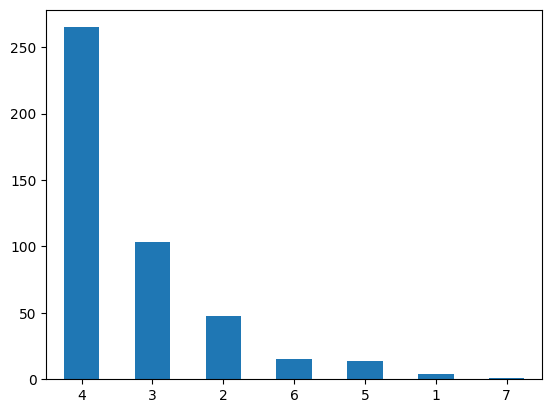

In [26]:
df_test['CLASSE'].value_counts().plot.bar(rot=0)

In [27]:
df_test.drop(['CLASSE', 'VIGOR'], inplace=True, axis=1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df_test, classe, test_size=0.33)

In [29]:
rf=RandomForestClassifier(n_estimators=250)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=250)

In [30]:
pred=rf.predict(X_test)
print ("Classification Report")
print(classification_report(y_test, pred))
print ("Confusion Report")
print(confusion_matrix(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        15
           3       0.57      0.11      0.19        36
           4       0.61      0.98      0.75        88
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         3

    accuracy                           0.60       149
   macro avg       0.20      0.18      0.16       149
weighted avg       0.50      0.60      0.49       149

Confusion Report
[[ 0  0  0  2  0  0]
 [ 0  0  1 14  0  0]
 [ 0  0  4 32  0  0]
 [ 0  0  2 86  0  0]
 [ 0  0  0  5  0  0]
 [ 0  0  0  3  0  0]]


/home/luan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/luan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/luan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test, pred)

0.6040268456375839

In [32]:
from classificadores import *

--Classificator--
The classificator is: SVM
0.5937 accuracy with a standard deviation of 0.0078
0.1030 precision with a standard deviation of 0.0089
0.1733 recall with a standard deviation of 0.0133
0.1292 F1 with a standard deviation of 0.0107
-----------------------------------------------------------
SVM, Hold out, Acc =  0.5777777777777777
-----------------------------------------------------------


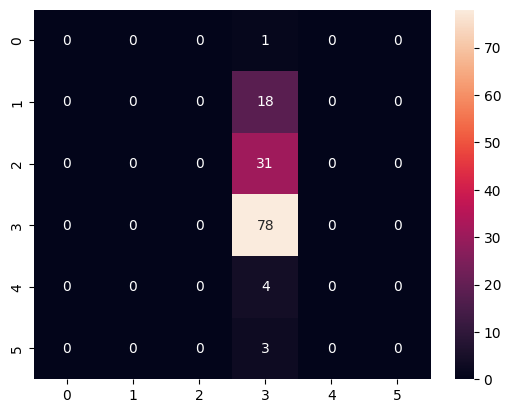

In [33]:
svmclassificator(df_test, classe, 5)

--Classificator--
The classificator is: GNB
0.3644 accuracy with a standard deviation of 0.1218
0.1985 precision with a standard deviation of 0.0747
0.2098 recall with a standard deviation of 0.1019
0.1764 F1 with a standard deviation of 0.0654
-----------------------------------------------------------
Gaussian Naive Bayes, Hold out, Acc =  0.4148148148148148
-----------------------------------------------------------


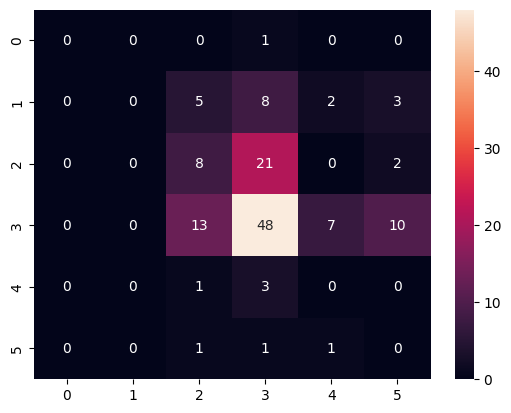

In [34]:
naivesBayesClassificator(df_test, classe, 10)

--Classificator--
The classificator is: RF
0.5133 accuracy with a standard deviation of 0.1152
0.1257 precision with a standard deviation of 0.0514
0.1677 recall with a standard deviation of 0.0312
0.1319 F1 with a standard deviation of 0.0223
-----------------------------------------------------------
Random Forest, Hold out, Acc =  0.5777777777777777
-----------------------------------------------------------


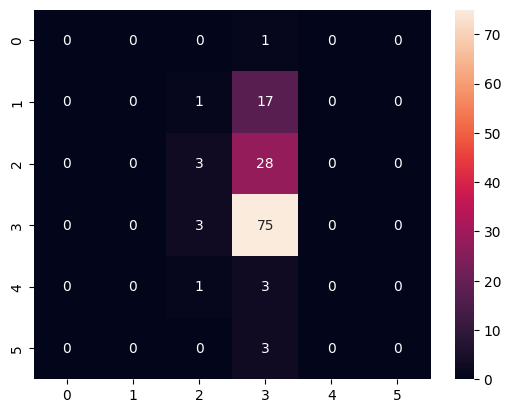

In [35]:
ramdomForestClassificator(df_test, classe, 10)

In [36]:
mlpclassificator(df_test, classe, 5)

--Classificator--
The classificator is: MLP
0.2556 accuracy with a standard deviation of 0.1835
0.0441 precision with a standard deviation of 0.0305
0.1400 recall with a standard deviation of 0.0712
0.0647 F1 with a standard deviation of 0.0387
-----------------------------------------------------------
Saída da rede:	 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
Saída desejada:	 445    4
360    4
159    3
90     4
47     4
      ..
124    2
174    6
361    4
14     4
354    4
Name: CLASSE, Length: 180, dtype: int64
-----------------------------------------------------------
Score:  0.2222222222222222
MLP, hold out:  0.2222222222222222


In [37]:
gradienteBooClassificator(df_test, classe, 5)

--Classificator--
The classificator is: GB
0.4822 accuracy with a standard deviation of 0.0552
0.1818 precision with a standard deviation of 0.0638
0.1760 recall with a standard deviation of 0.0649
0.1626 F1 with a standard deviation of 0.0635
-----------------------------------------------------------
Gradient Boosting, Hold out, Acc =  0.5407407407407407
-----------------------------------------------------------


In [39]:
knnclassificator(df_test, classe, 5)

--Classificator--
The classificator is: KNN
0.3746 accuracy with a standard deviation of 0.0342
0.1720 precision with a standard deviation of 0.0144
0.1783 recall with a standard deviation of 0.0259
0.1638 F1 with a standard deviation of 0.0130
-----------------------------------------------------------
KNN, Hold out, Acc =  0.4
-----------------------------------------------------------


--Classificator--
The classificator is: ET
0.5000 accuracy with a standard deviation of 0.0823
0.1436 precision with a standard deviation of 0.0452
0.1639 recall with a standard deviation of 0.0262
0.1419 F1 with a standard deviation of 0.0261
-----------------------------------------------------------
Extra Tree, Hold out, Acc =  0.5703703703703704
-----------------------------------------------------------


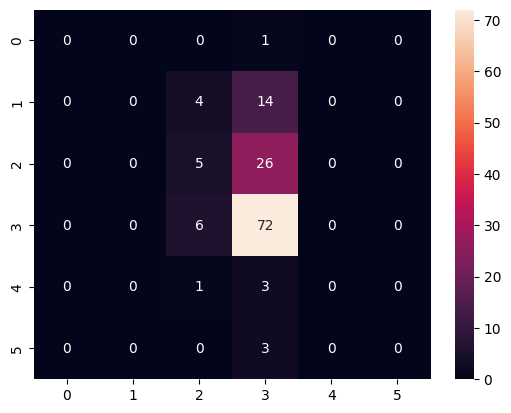

In [40]:
extraTreeClassificator(df_test, classe, 5)

--Classificator--
The classificator is: DT
0.3622 accuracy with a standard deviation of 0.0619
0.1470 precision with a standard deviation of 0.0104
0.1562 recall with a standard deviation of 0.0513
0.1311 F1 with a standard deviation of 0.0249
-----------------------------------------------------------
Decision Tree, Hold out, Acc =  0.362962962962963
-----------------------------------------------------------


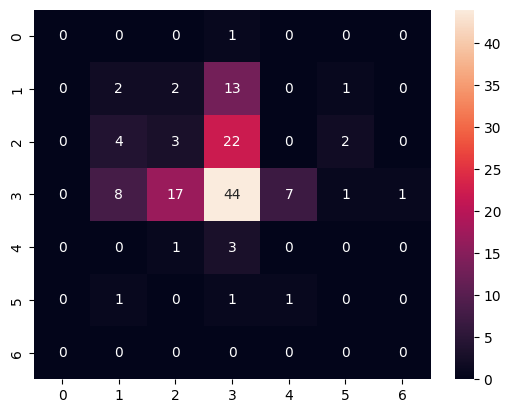

In [41]:
dicisionTreeClassificator(df_test, classe, 5)

In [39]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(
    iterations=100,
    random_seed=42,
    learning_rate=0.1,
    custom_loss=['AUC', 'Accuracy'],
#   verbose=5,
    task_type="GPU"
)

clf.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
)

CatBoostError: catboost/private/libs/algo/data.cpp:196: Dataset test #0 contains class label "7" that is not present in the learn dataset

In [ ]:
pred=clf.predict(X_test)
print ("Classification Report")
print(classification_report(y_test, pred))
print ("Confusion Report")
print(confusion_matrix(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        15
           3       0.31      0.14      0.19        36
           4       0.62      0.92      0.74        90
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3

    accuracy                           0.59       149
   macro avg       0.16      0.18      0.16       149
weighted avg       0.45      0.59      0.50       149

Confusion Report
[[ 0  0  0  1  0  0]
 [ 0  0  4 11  0  0]
 [ 0  0  5 31  0  0]
 [ 0  0  7 83  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  3  0  0]]
